In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
#output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180) 

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

622

In [3]:
cities[1]

'tilichiki'

In [4]:
#key = weather_api_key
#unit = 'imperial'
#city_name = cities[1]
#final_url = f'http://api.openweathermap.org/data/2.5/weather?q={city_name}&units={unit}&appid={key}'
#data = requests.get(final_url).json()

#date = data['dt']
#country = data['sys']['country']
#lat = data['coord']['lat']
#lng = data['coord']['lon']
#temp = data['main']['temp']
#cness = data['clouds']['all']
#hum = data['main']['humidity']
#wspeed = data['wind']['speed']
#print(lat, lng, temp, cness, hum, wspeed, date, country)

In [5]:
#empty lists for data desired in columns for eventual df
cities_w_data = []
lats_data = []
longs_data = []
temps = []
cnesses = []
hums = []
wspeeds = []
dates = []
country_codes = []

#for loop for calling api for each city in the cities list
key = weather_api_key
unit = 'imperial'
for x in range (0, len(cities)):
    try:
        #include try/except in case a city can't be found in OWM
        city_name = cities[x]
        final_url = f'http://api.openweathermap.org/data/2.5/weather?q={city_name}&units={unit}&appid={key}'
        data = requests.get(final_url).json()
        lat = data['coord']['lat']
        lats_data.append(lat)
        lng = data['coord']['lon']
        longs_data.append(lng)
        temp = data['main']['temp_max']
        temps.append(temp)
        cness = data['clouds']['all']
        cnesses.append(cness)
        hum = data['main']['humidity']
        hums.append(hum)
        wspeed = data['wind']['speed']
        wspeeds.append(wspeed)
        date = data['dt']
        dates.append(date)
        country = data['sys']['country']
        country_codes.append(country)
        print(f'working on record {x+1}: {city_name}')
        #only appending city name at end, to make sure that cities that don't have data aren't appended
        cities_w_data.append(city_name)
    except KeyError:
        print(f'City {city_name} not found, skipping.')
        continue

working on record 1: bengkulu
working on record 2: tilichiki
working on record 3: jamestown
working on record 4: bambous virieux
working on record 5: hithadhoo
working on record 6: cape town
working on record 7: harstad
working on record 8: hailar
working on record 9: turiacu
working on record 10: tuktoyaktuk
working on record 11: fort nelson
working on record 12: busselton
working on record 13: ribeira grande
City stoyba not found, skipping.
working on record 15: shurugwi
working on record 16: souillac
working on record 17: guerrero negro
working on record 18: tuatapere
City vaitupu not found, skipping.
working on record 20: montrose
working on record 21: hilo
City bengkalis not found, skipping.
working on record 23: maningrida
working on record 24: nikolskoye
working on record 25: atherton
working on record 26: hirapur
working on record 27: carnarvon
working on record 28: pasighat
working on record 29: ahipara
working on record 30: punta arenas
working on record 31: nhulunbuy
working

working on record 257: camacha
working on record 258: boca do acre
working on record 259: billings
working on record 260: barentu
working on record 261: zeya
working on record 262: plettenberg bay
working on record 263: oranjemund
working on record 264: portland
working on record 265: gornopravdinsk
working on record 266: hay river
working on record 267: evensk
working on record 268: riyadh
working on record 269: caraycayon
working on record 270: srednekolymsk
working on record 271: kabo
working on record 272: bredasdorp
working on record 273: paamiut
working on record 274: copiapo
working on record 275: dali
working on record 276: pozo colorado
City illoqqortoormiut not found, skipping.
working on record 278: luderitz
working on record 279: saint george
working on record 280: lima
City zaplyusye not found, skipping.
working on record 282: aksu
working on record 283: valley city
working on record 284: qarqin
City vaovai not found, skipping.
working on record 286: vila franca do campo
w

working on record 511: sioux lookout
working on record 512: coahuayana
working on record 513: cayenne
working on record 514: boyuibe
working on record 515: talnakh
working on record 516: luganville
working on record 517: fairbanks
working on record 518: madarounfa
working on record 519: jati
working on record 520: saint-augustin
working on record 521: vila velha
City sigerfjord not found, skipping.
City fianga not found, skipping.
working on record 524: sao luiz gonzaga
working on record 525: santa cruz
working on record 526: chernyshevskiy
working on record 527: itaituba
working on record 528: caxias
working on record 529: vazhiny
working on record 530: berea
City tasbuget not found, skipping.
working on record 532: san patricio
working on record 533: laguna
working on record 534: apache junction
working on record 535: gidam
working on record 536: esmeraldas
working on record 537: along
working on record 538: zagan
working on record 539: morondava
working on record 540: kashan
working

In [6]:
#making sure lists are all of same length
print(len(cities_w_data))
print(len(lats_data))
print(len(longs_data))
print(len(temps))
print(len(cnesses))
print(len(hums))
print(len(wspeeds))
print(len(dates))
print(len(country_codes))

570
570
570
570
570
570
570
570
570


In [7]:
#creating df for weather info
weather_data_df = pd.DataFrame({'city_name': cities_w_data,
                                'lat': lats_data,
                                'long': longs_data,
                                'temp': temps,
                                'cloudiness': cnesses,
                                'humidity': hums,
                                'wind_speed': wspeeds,
                                'country_code': country_codes,
                                'date_of_measurement': dates
                               })
#checking df length
print(len(weather_data_df))
#checking for any null values
print(weather_data_df.isnull().value_counts())
#printing sample of data
weather_data_df.sample(10)

570
city_name  lat    long   temp   cloudiness  humidity  wind_speed  country_code  date_of_measurement
False      False  False  False  False       False     False       False         False                  570
dtype: int64


,city_name,lat,long,temp,cloudiness,humidity,wind_speed,country_code,date_of_measurement
22,hirapur,21.53,79.77,58.60,0,40,2.30,IN,1608738232
430,pisco,-13.70,-76.22,71.60,20,78,11.41,PE,1608738206
537,bahia honda,22.90,-83.16,75.54,6,69,10.36,CU,1608738263
371,camana,-16.62,-72.71,72.63,73,67,9.04,PE,1608738252
549,grand-lahou,5.14,-5.02,82.08,77,76,7.63,CI,1608738264
173,padang,-0.95,100.35,77.83,98,77,4.00,ID,1608738239
255,luderitz,-26.65,15.16,73.08,0,51,28.92,NA,1608738207
229,tiznit,29.58,-9.50,66.65,0,27,5.86,MA,1608738243
208,coquimbo,-29.95,-71.34,60.80,90,77,8.05,CL,1608738241
68,barrow,71.29,-156.79,-5.80,40,76,14.99,US,1608738213


In [8]:
#finding max humidity value to see if any have to be removed
weather_data_df['humidity'].max()

100

In [9]:
#saving weather data as csv
output_path = 'outputs/cities.csv'
weather_data_df.to_csv(output_path)

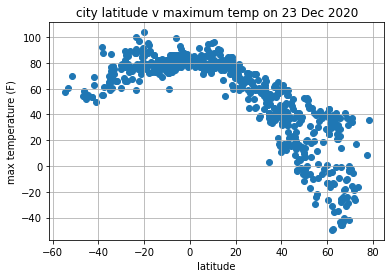

In [22]:
#scatter for temp v. lat
x_axis1 = weather_data_df['lat']
y_axis1 = weather_data_df['temp']
plt.title('city latitude v maximum temp on 23 Dec 2020')
plt.xlabel('latitude')
plt.ylabel('max temperature (F)')
plt.grid()
plt.scatter(x_axis1, y_axis1)
plt.show()

The above plot shows the maximum temperature (F) of 564 randomly selected cities, taken on 23 December 2020, and compares those temperatures to each city's latitude (degrees north or south of the equator). The plot seems to follow a parabolic curve, which grows more diffuse as the latitude increases above 20 degrees.

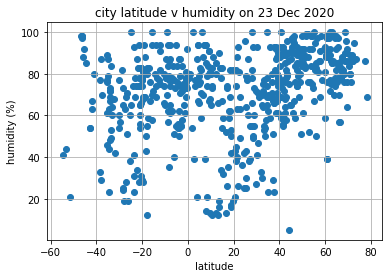

In [23]:
#scatter for hum v. lat
x_axis2 = weather_data_df['lat']
y_axis2 = weather_data_df['humidity']
plt.title('city latitude v humidity on 23 Dec 2020')
plt.xlabel('latitude')
plt.ylabel('humidity (%)')
plt.grid()
plt.scatter(x_axis2, y_axis2)
plt.show()

The above plot shows the humidity of 564 randomly selected cities, taken on 23 December 2020, and compares those humidities to each city's latitude (degrees north or south of the equator). There does not appear to be a clear relationship between the humidity and the latitude.

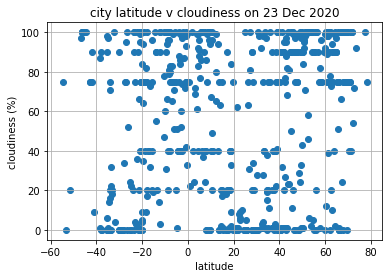

In [24]:
#scatter for cloudiness v. lat
x_axis3 = weather_data_df['lat']
y_axis3 = weather_data_df['cloudiness']
plt.title('city latitude v cloudiness on 23 Dec 2020')
plt.xlabel('latitude')
plt.ylabel('cloudiness (%)')
plt.grid()
plt.scatter(x_axis3, y_axis3)
plt.show()

The above plot shows the cloudiness of 564 randomly selected cities, taken on 23 December 2020, and compares those to each city's latitude (degrees north or south of the equator). There seems to be a degree of stratification in the data: at 0%, 20%, 40%, ~75% and 100%, there are clusters of data points, ranging from latitudes of -40 to +80 degrees.  

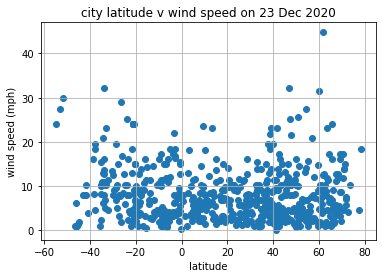

In [25]:
#scatter for wind speed v. lat
x_axis4 = weather_data_df['lat']
y_axis4 = weather_data_df['wind_speed']
plt.title('city latitude v wind speed on 23 Dec 2020')
plt.xlabel('latitude')
plt.ylabel('wind speed (mph)')
plt.grid()
plt.scatter(x_axis4, y_axis4)
plt.show()

The above plot shows the wind speed of 564 randomly selected cities, taken on 23 December 2020, and compares those to each city's latitude (degrees north or south of the equator). Most cities, irrespective of latitude, have wind speeds between 0 - 20 mph, but there are some data points with wind speed increasing as latitude increasing above zero, and decreasing below zero, which may suggest that as the distance away from the equator increases, wind speed also increases. 

In [26]:
#filtering only northern hemisphere cities
northern_hemi_data_df = weather_data_df[weather_data_df['lat'] > 0]
print(len(northern_hemi_data_df))
northern_hemi_data_df.sample(10)

378


,city_name,lat,long,temp,cloudiness,humidity,wind_speed,country_code,date_of_measurement
31,sitka,57.05,-135.33,42.80,90,81,20.80,US,1608738216
399,miri,4.41,114.01,78.80,40,94,2.24,MY,1608738254
511,manavalakurichi,8.13,77.30,84.20,75,74,2.24,IN,1608738261
353,upernavik,72.79,-56.15,17.11,72,95,4.16,GL,1608738203
514,dingle,11.00,122.67,75.76,40,88,6.78,PH,1608738261
464,sioux lookout,50.10,-91.92,6.80,90,84,10.29,CA,1608738216
444,tahe,52.33,124.73,-6.36,58,88,2.75,CN,1608738258
321,kemin,42.78,75.69,26.10,95,78,4.12,KG,1608738249
109,kavaratti,10.57,72.64,82.04,96,73,6.80,IN,1608738216
340,yumen,40.28,97.20,15.58,0,75,4.59,CN,1608738250


In [27]:
#filtering only southern hemisphere cities
southern_hemi_data_df = weather_data_df[weather_data_df['lat'] < 0]
print(len(southern_hemi_data_df))
southern_hemi_data_df.sample(10)

192


,city_name,lat,long,temp,cloudiness,humidity,wind_speed,country_code,date_of_measurement
57,esperance,-33.87,121.90,60.80,0,72,12.75,AU,1608738200
161,manta,-0.95,-80.73,80.60,75,69,2.24,EC,1608738106
48,cap malheureux,-19.98,57.61,79.00,4,78,8.99,MU,1608738208
366,touros,-5.20,-35.46,86.00,75,55,18.34,BR,1608738214
499,wanaka,-44.70,169.15,55.00,100,85,1.99,NZ,1608738261
87,lorengau,-2.02,147.27,82.17,100,75,4.45,PG,1608738222
143,faanui,-16.48,-151.75,80.24,32,76,10.80,PF,1608738200
186,tupaciguara,-18.59,-48.70,77.00,75,69,12.75,BR,1608738240
69,mataura,-46.19,168.86,54.00,100,98,1.01,NZ,1608738200
398,poum,-20.23,164.02,78.91,9,77,6.55,NC,1608738254


The r-value is -0.8398739073338702


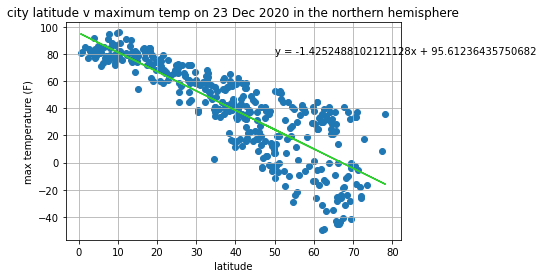

In [28]:
#scatter for northern hemi temp v. lat
x_axis1a = northern_hemi_data_df['lat']
y_axis1a = northern_hemi_data_df['temp']
(slope, intercept, rval, pval, stderr) = linregress(x_axis1a, y_axis1a)
print(f'The r-value is {rval}')
show_eq = f'y = {slope}x + {intercept}'
y_linreg1a = (slope * x_axis1a) + intercept
plt.title('city latitude v maximum temp on 23 Dec 2020 in the northern hemisphere')
plt.xlabel('latitude')
plt.ylabel('max temperature (F)')
plt.grid()
plt.scatter(x_axis1a, y_axis1a)
plt.plot(x_axis1a, y_linreg1a, color='limegreen')
plt.annotate(show_eq, (50, 80))
plt.show()

The above graph shows a linear regression done on the latitude of all of the 564 randomly selected cities located in the northern hemisphere (378 cities), compared to those cities' maximum temperature measured on 23 December 2020. There is a fairly strong negative correlation between the maximum temperature and the latitude: as the latitude increases (grows further away from the equator), the maximum temperature decreases. This makes sense, as the equator receives the most direct sunlight/heat, and therefore, as the distance from the equator increases, less heat reaches cities located at those latitudes. As the latitude increases, however, the maximum temperature values become more spread out. 

The r-value is 0.5973826582346287


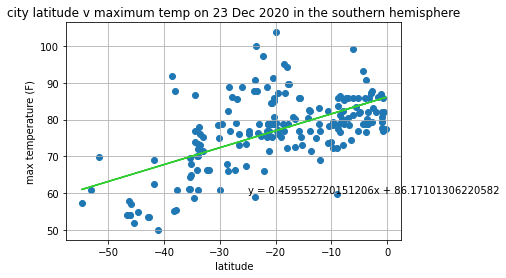

In [29]:
#scatter for southern hemi temp v. lat
x_axis1b = southern_hemi_data_df['lat']
y_axis1b = southern_hemi_data_df['temp']
(slope, intercept, rval, pval, stderr) = linregress(x_axis1b, y_axis1b)
print(f'The r-value is {rval}')
show_eq = f'y = {slope}x + {intercept}'
y_linreg1b = (slope * x_axis1b) + intercept
plt.title('city latitude v maximum temp on 23 Dec 2020 in the southern hemisphere')
plt.xlabel('latitude')
plt.ylabel('max temperature (F)')
plt.grid()
plt.scatter(x_axis1b, y_axis1b)
plt.plot(x_axis1b, y_linreg1b, color='limegreen')
plt.annotate(show_eq, (-25, 60))
plt.show()

The above graph shows a linear regression done on the latitude of all of the 564 randomly selected cities located in the southern hemisphere (192 cities), compared to those cities' maximum temperature measured on 23 December 2020. There is a moderately strong positive correlation between maximum temperature and latitude, which makes sense, for as the distance to the equator decreases, and more direct sunlight reaches cities at those locations, the maximum temperature should increase. The correlation appears less strong than in the northern hemisphere. This could be due to the fact that fewer cities (192 vs. 378) were collected for the southern hemisphere, so it could be that potential temperature outliers are having more weight in the data. 

The r-value is 0.3906617573863922


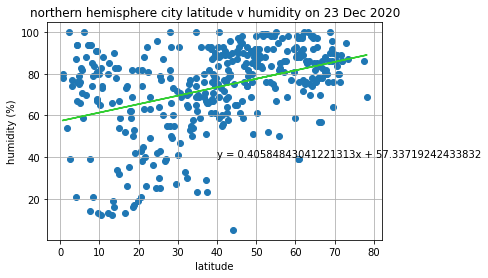

In [31]:
#scatter for northern hemisphere hum v. lat
x_axis2a = northern_hemi_data_df['lat']
y_axis2a = northern_hemi_data_df['humidity']
(slope, intercept, rval, pval, stderr) = linregress(x_axis2a, y_axis2a)
print(f'The r-value is {rval}')
show_eq = f'y = {slope}x + {intercept}'
y_linreg2a = (slope * x_axis2a) + intercept
plt.title('northern hemisphere city latitude v humidity on 23 Dec 2020')
plt.xlabel('latitude')
plt.ylabel('humidity (%)')
plt.grid()
plt.scatter(x_axis2a, y_axis2a)
plt.plot(x_axis2a, y_linreg2a, color='limegreen')
plt.annotate(show_eq, (40, 40))
plt.show()

The above graph shows a linear regression done on the latitude of all of the 564 randomly selected cities located in the northern hemisphere (378 cities), compared to those cities' humidity measured on 23 December 2020. There is a weak positive correlation between latitude and humidity: as latitude increases, humidity also increases. However, there is a large degree of spread in humidity per latitude, especially in latitudes closer to the equator. 

The r-value is 0.16548054348043817


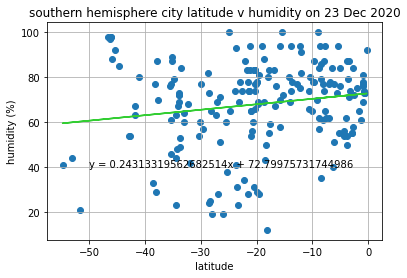

In [33]:
#scatter for southern hemisphere hum v. lat
x_axis2b = southern_hemi_data_df['lat']
y_axis2b = southern_hemi_data_df['humidity']
(slope, intercept, rval, pval, stderr) = linregress(x_axis2b, y_axis2b)
print(f'The r-value is {rval}')
show_eq = f'y = {slope}x + {intercept}'
y_linreg2b = (slope * x_axis2b) + intercept
plt.title('southern hemisphere city latitude v humidity on 23 Dec 2020')
plt.xlabel('latitude')
plt.ylabel('humidity (%)')
plt.grid()
plt.scatter(x_axis2b, y_axis2b)
plt.plot(x_axis2b, y_linreg2b, color='limegreen')
plt.annotate(show_eq, (-50, 40))
plt.show()

The above graph shows a linear regression done on the latitude of all of the 564 randomly selected cities located in the southern hemisphere (192 cities), compared to those cities' humidity measured on 23 December 2020. There is a weak negative correlation between latitude and humidity: as 